<a href="https://colab.research.google.com/github/xalo1987/Proyecto_DataAnalysis/blob/main/Text_clasiffy_ChileNews_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!pip install umap-learn[plot]
!pip install umap-learn

In [43]:
import pandas as pd
from google.colab import drive
import numpy as np
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


# Descargar recursos de nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

In [85]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import umap
import umap.plot

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [47]:
ruta_train = '/content/drive/My Drive/Colab Notebooks/Text_clasify_dataset/CNN_train.csv'
ruta_test = '/content/drive/My Drive/Colab Notebooks/Text_clasify_dataset/CNN_test.csv'
ruta_val = '/content/drive/My Drive/Colab Notebooks/Text_clasify_dataset/CNN_valid.csv'
df_train = pd.read_csv(ruta_train, index_col=None) #removiendo indice de la lectura
df_test = pd.read_csv(ruta_test, index_col=None) #removiendo indice de la lectura
df_val = pd.read_csv(ruta_val, index_col=None) #removiendo indice de la lectura


In [48]:
etiquetas = df_train['label'].unique()
print(etiquetas)

['catástrofes y accidentes' 'ciencia y tecnología'
 'crimen, delitos y justicia' 'cultura y arte' 'deporte'
 'ecología y planeta' 'economía' 'mundo' 'política y conflictos' 'salud']


In [49]:
print(df_train.columns)

Index(['text', 'label'], dtype='object')


In [50]:
print("The dataset contains", df_train.label.nunique(), "categories.")
df_train.label.value_counts()

The dataset contains 10 categories.


catástrofes y accidentes      3927
ciencia y tecnología          3927
crimen, delitos y justicia    3927
cultura y arte                3927
deporte                       3927
ecología y planeta            3927
economía                      3927
mundo                         3927
política y conflictos         3927
salud                         3927
Name: label, dtype: int64

In [51]:
print("Category target: ", df_train["label"][0])
"Category text: ", df_train["text"][0]

Category target:  catástrofes y accidentes


('Category text: ',
 'Francia superó este martes el umbral de los 42.000 fallecidos debido al Covid-19, en una jornada en la que las admisiones en unidades de cuidados intensivos continúan en aumento en el país. Según los datos proporcionados por el Ministerio de Salud francés, un total de 472 personas han muerto en las últimas 24 horas debido a la enfermedad, lo que ha elevado el cómputo global de fallecidos hastComo un acto de “intencionalidad extrema” calificó la Conaf el incendio forestal que en este momento tiene bajo alerta máxima a la zona de Quilpué y sus alrededores y que ha obligado a evacuar a varias poblaciones de esta ciudad de la región de Valparaíso. Según detalló el organismo tras una reunión de coordinación en la Onemi, el primer foco del siniestro fue encendido a las 21 de la noche de ayer cuando los aviones de Conaf no podían proceder, y una hora depsues encendieron un segundo foco en el sector del Lago Peñuelas. Durante la mañana, prendieron otros dos focos en el se

In [52]:
for etiq in etiquetas:
  print( ' *****  Label : ', etiq)
  mask = df_train["label"] == etiq
  noticias_resumen =  df_train[mask]['text'].values
  for i in range(0,10):
    print(noticias_resumen[i])

 *****  Label :  catástrofes y accidentes
Francia superó este martes el umbral de los 42.000 fallecidos debido al Covid-19, en una jornada en la que las admisiones en unidades de cuidados intensivos continúan en aumento en el país. Según los datos proporcionados por el Ministerio de Salud francés, un total de 472 personas han muerto en las últimas 24 horas debido a la enfermedad, lo que ha elevado el cómputo global de fallecidos hastComo un acto de “intencionalidad extrema” calificó la Conaf el incendio forestal que en este momento tiene bajo alerta máxima a la zona de Quilpué y sus alrededores y que ha obligado a evacuar a varias poblaciones de esta ciudad de la región de Valparaíso. Según detalló el organismo tras una reunión de coordinación en la Onemi, el primer foco del siniestro fue encendido a las 21 de la noche de ayer cuando los aviones de Conaf no podían proceder, y una hora depsues encendieron un segundo foco en el sector del Lago Peñuelas. Durante la mañana, prendieron otro

# Identificando labesl con Etiquetas

In [53]:
# Crea una instancia de LabelEncoder.
label_encoder = LabelEncoder()

# Ajusta el LabelEncoder a tus categorías.
df_train['Cluster_Num'] = label_encoder.fit_transform(df_train['label'])
df_test['Cluster_Num'] = label_encoder.fit_transform(df_test['label'])
df_val['Cluster_Num'] = label_encoder.fit_transform(df_val['label'])

In [54]:
etiquetas = []
for a in df_train['Cluster_Num'].unique():
  df_mask = df_train['Cluster_Num'] == a
  positions = np.flatnonzero(df_mask)
  filtered_df = df_train.iloc[positions]
  dat = filtered_df['label'].values
  print( f'Cluster : {a}  ,  Label : {dat[0]}'  )
  etiquetas.append(dat[0])
for a in df_test['Cluster_Num'].unique():
  df_mask = df_test['Cluster_Num'] == a
  positions = np.flatnonzero(df_mask)
  filtered_df = df_test.iloc[positions]
  dat = filtered_df['label'].values
  #print( f'Cluster : {a}  ,  Label : {dat[0]}'  )
for a in df_val['Cluster_Num'].unique():
  df_mask = df_val['Cluster_Num'] == a
  positions = np.flatnonzero(df_mask)
  filtered_df = df_val.iloc[positions]
  dat = filtered_df['label'].values
  #print( f'Cluster : {a}  ,  Label : {dat[0]}'  )

Cluster : 0  ,  Label : catástrofes y accidentes
Cluster : 1  ,  Label : ciencia y tecnología
Cluster : 2  ,  Label : crimen, delitos y justicia
Cluster : 3  ,  Label : cultura y arte
Cluster : 4  ,  Label : deporte
Cluster : 5  ,  Label : ecología y planeta
Cluster : 6  ,  Label : economía
Cluster : 7  ,  Label : mundo
Cluster : 8  ,  Label : política y conflictos
Cluster : 9  ,  Label : salud


# Analisis de clusterizacion con UMAP

In [55]:
epocas = 4
l_text = 75
maxlen = l_text

## Funcion que saca las N (l_text) palabras mas importantes del texto

In [56]:
def Text_resumen(text,l_text):
  texto_largo = text
  words = word_tokenize(texto_largo)  #  split palabra por palabra
  words = [word.lower() for word in words if word.isalnum()]  # convierte las palabras mayusculas a minusculas
  filtered_words = [word for word in words if word not in stop_words]  # Filtramos las palabras que no esntan en nuestro diccionario
  tfidf_vectorizer = TfidfVectorizer()  # inicializamos el evaluador estadistico de palabras para ver las relaciones entre ellas
  tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(filtered_words)])
  feature_names = tfidf_vectorizer.get_feature_names_out()
  top_words = []
  for col in tfidf_matrix.nonzero()[1]:
    top_words.append((feature_names[col], tfidf_matrix[0, col]))
  top_words = sorted(top_words, key=lambda x: x[1], reverse=True)
  resumen = ""
  word_count = 0
  for word, tfidf_score in top_words:
    if word_count + len(word.split()) <= l_text:
      resumen += word + " "
      word_count += len(word.split())
    else:
      break
  return resumen

## Juntamos toda la data

In [57]:
# Supongamos que tienes un conjunto de datos de texto y etiquetas
#texts = test_df['Evento'].values  # Tus textos aquí
#labels = test_df['Cluster_Num'].values  # Tus etiquetas aquí

#texts = np.concatenate((df_train['text'].values, df_test['text'].values , df_val['text'].values))    # Tus textos aquí
#labels = np.concatenate((df_train['Cluster_Num'].values, df_test['Cluster_Num'].values , df_val['Cluster_Num'].values))   # Tus etiquetas aquí

#print(len(texts), len(labels))


## Juntamos y revolvemos la data

In [58]:
df_newsTotal = pd.concat([df_train,df_test,df_val], ignore_index=True)
print(len(df_newsTotal))
df_newsTotal.head()

56337


,text,label,Cluster_Num
0,Francia superó este martes el umbral de los 42...,catástrofes y accidentes,0
1,"Carmen Balcazar, madre de Luis Morales Balcaza...",catástrofes y accidentes,0
2,La pandemia de nuevo coronavirus ha provocado ...,catástrofes y accidentes,0
3,Este jueves se registró un temblor magnitud 7....,catástrofes y accidentes,0
4,Fue durante el rodaje de la segunda temporada ...,catástrofes y accidentes,0


In [59]:
# Barajar aleatoriamente las filas
df_newsTotal_ = df_newsTotal.iloc[np.random.permutation(len(df_newsTotal))]

# Reiniciar los índices después de barajar
df_newsTotal_.reset_index(drop=True, inplace=True)
print(len(df_newsTotal_))
df_newsTotal_.head()

56337


,text,label,Cluster_Num
0,Menos incidentes pero más violentos. Esa fue l...,"crimen, delitos y justicia",2
1,El trabajo de investigación de ejecutados y de...,salud,9
2,En una práctica que ya es habitual tras manife...,cultura y arte,3
3,El contrato del futbolista argentino Lionel M...,deporte,4
4,El gigante coreano Hyundai y el gobierno del ...,economía,6


In [64]:
texts = df_newsTotal_['text'].values
labels = df_newsTotal_['Cluster_Num'].values

print(len(texts), len(labels))

56337 56337


## Contamos todas las palabras de cada texto antes de obtener paabras mas importantes

In [65]:
texts_ = []
labels_ = []
j=0
for i,(a,b) in enumerate(zip(texts,labels)):
  #print(f'*********************    Iteracion : {i}  *******************')
  if i == 5000:
    break
  try:
    texts_.append(Text_resumen(a, l_text))
    labels_.append(b)
  except:
    j += 1
print('Cantidad de textos no convertidos : ',j)

Cantidad de textos no convertidos :  1


In [66]:
texts_[0]

('acusación ministro constitucional diputado pérez chantaje rozas día vida aquí rol autocrítica esperado hoy hacer voy dijo carabineros general electrónico medio parlamentaria señaló continuar va cómo procedimiento vista punto ver vinculantes primer determinado distintas absolutamente cosas retiro supeditado jamás firmamos moneda acuerdo termina finalmente camioneros paro apuntó declaración impresentable calificó frvs sepúlveda alejandra diputada vaya necesario sólo realidad así alturas pasa naturaleza ninguna ningún tono mismo planteó dc ascencio gabriel manifestando especialmente gente humanos derechos ',)

In [67]:
texts_ = [ texto[0]  for texto in texts_ ]
texts_[0]

'acusación ministro constitucional diputado pérez chantaje rozas día vida aquí rol autocrítica esperado hoy hacer voy dijo carabineros general electrónico medio parlamentaria señaló continuar va cómo procedimiento vista punto ver vinculantes primer determinado distintas absolutamente cosas retiro supeditado jamás firmamos moneda acuerdo termina finalmente camioneros paro apuntó declaración impresentable calificó frvs sepúlveda alejandra diputada vaya necesario sólo realidad así alturas pasa naturaleza ninguna ningún tono mismo planteó dc ascencio gabriel manifestando especialmente gente humanos derechos '

In [68]:
print(type(texts_))

<class 'list'>


In [69]:
# Tokeniza los textos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts_)
sequences = tokenizer.texts_to_sequences(texts_)

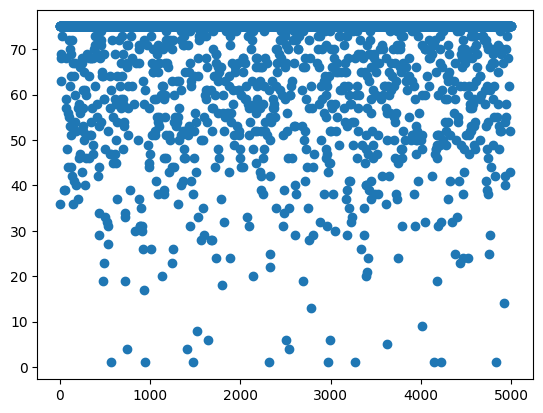

In [70]:
seq = []
for a in sequences:
  seq.append(len(a))
plt.plot( seq , 'o' )

## Generando nuevo dataframe

In [71]:
# Crear un DataFrame de ejemplo
data = {'Labels': labels_,
        'News': sequences}
df_news = pd.DataFrame(data)

In [72]:
df_news.head()

,Labels,News
0,2,"[409, 30, 163, 268, 332, 11707, 1395, 36, 84, ..."
1,6,"[18, 3828, 294, 161, 13, 462, 110, 20, 32, 199..."
2,1,"[18, 1152, 332, 30, 114, 107, 87, 9, 25, 255, ..."
3,9,"[11, 27, 226, 45, 2448, 737, 818, 242, 2536, 4..."
4,4,"[15, 7471, 2813, 1306, 17, 6082, 3479, 8457, 1..."


## Aplicamos un padding

In [73]:
# Aplica padding para que todas las secuencias tengan la misma longitud
#maxlen = int(percentile)  # Longitud máxima de la secuencia
data_pad = pad_sequences(sequences, maxlen=maxlen)

In [74]:
data_pad[0]

array([  409,    30,   163,   268,   332, 11707,  1395,    36,    84,
         123,  1151,  7467,  1762,    35,    92,  1013,    20,    38,
         105,  4037,    76,  1995,    77,  1568,   120,   285,   663,
         839,   416,    52, 20100,    80,  5618,   596,  1649,   485,
         161, 14607,  3318, 14608,   892,    44,  3319,   225,  1152,
         957,  1501,   568, 20101,  1685,  4524,  3475,  3024,   647,
        3025,   736,   286,   783,    29,  4255,  1431,  1279,   584,
         559,  4525,    93,  1537,   569,  5194,  1432,  4851,   805,
         204,   433,   289], dtype=int32)

In [75]:
print(  len(labels_), len(data_pad))
data_list = [ list(dat) for dat in data_pad ]
data_ = {'Labels': labels_,
        'News': data_list}
df_news_pad = pd.DataFrame(data_)
df_news_pad.head()

4999 4999


,Labels,News
0,2,"[409, 30, 163, 268, 332, 11707, 1395, 36, 84, ..."
1,6,"[18, 3828, 294, 161, 13, 462, 110, 20, 32, 199..."
2,1,"[18, 1152, 332, 30, 114, 107, 87, 9, 25, 255, ..."
3,9,"[11, 27, 226, 45, 2448, 737, 818, 242, 2536, 4..."
4,4,"[15, 7471, 2813, 1306, 17, 6082, 3479, 8457, 1..."


## Configurando el entrenamiendo

In [76]:
# Convierte las etiquetas a un formato adecuado (e.g., one-hot encoding)
num_classes = len(set(labels_))
labels = keras.utils.to_categorical(labels_, num_classes)

N_train = len(df_train)
N_test = len(df_test)
N_val = len(df_val)

# UMAP clustering

In [78]:
columnas = [ f"columna_{i}" for i in range(1,l_text+1) ]

In [79]:

# Dividir la columna 'Dato2' en tres columnas separadas
df_news_pad[columnas] = pd.DataFrame(df_news_pad['News'].tolist())
df_news_pad = df_news_pad.drop('News', axis=1)

In [80]:
display(df_news_pad.head(1000))
print(len(df_news_pad))

,Labels,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,...,columna_66,columna_67,columna_68,columna_69,columna_70,columna_71,columna_72,columna_73,columna_74,columna_75
0,2,409,30,163,268,332,11707,1395,36,84,...,93,1537,569,5194,1432,4851,805,204,433,289
1,6,18,3828,294,161,13,462,110,20,32,...,584,528,36,35,11708,3476,99,2050,1728,2109
2,1,18,1152,332,30,114,107,87,9,25,...,639,1686,451,529,2904,2447,1,9786,2720,263
3,9,11,27,226,45,2448,737,818,242,2536,...,2537,195,1153,717,5621,2905,239,9787,8456,2812
4,4,15,7471,2813,1306,17,6082,3479,8457,1463,...,11712,560,1071,105,6727,11713,111,56,20106,8458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8,2908,1,30,3600,328,96,1361,1651,149,...,7231,1098,76,168,359,1852,62,86,16600,3958
996,2,132,38,16601,12115,720,632,3743,8,987,...,9387,72,6945,23635,2662,23636,9388,6556,16605,878
997,4,745,402,117,3153,1908,565,1321,4119,595,...,3634,2901,4434,23639,2,4276,13081,2361,23,828
998,5,50,3243,2,16,41,231,2148,317,89,...,16611,123,6605,2749,6134,606,1233,75,6597,8212


4999


In [81]:
X_train = df_news_pad.drop('Labels', axis=1)
Y_train = df_news_pad['Labels']


## Metric 'hellinger'

In [83]:
%%time
embedding = umap.UMAP(n_components=2, metric='hellinger').fit(X_train)

CPU times: user 14.4 s, sys: 250 ms, total: 14.7 s
Wall time: 17.7 s


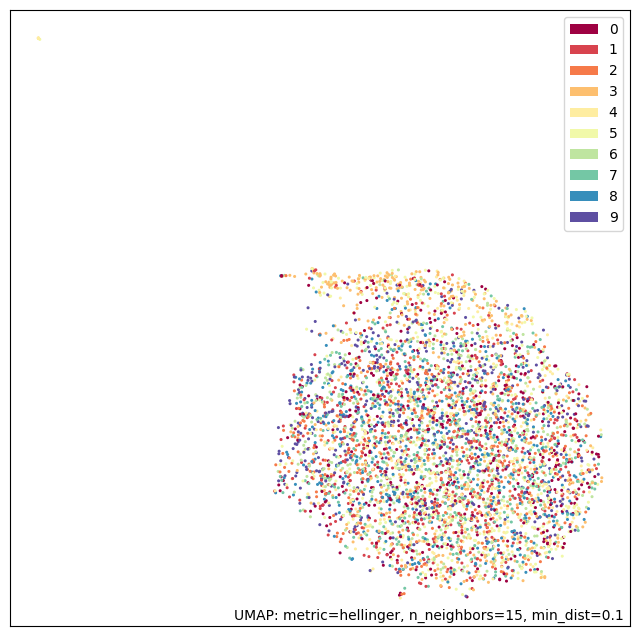

In [84]:
f = umap.plot.points(embedding, labels=Y_train)

## Metric 'mahalanobis'

In [85]:
%%time
embedding2 = umap.UMAP(n_components=2, metric='mahalanobis').fit(X_train)

/usr/local/lib/python3.10/dist-packages/pynndescent/pynndescent_.py:947: UserWarning: Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:126: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = inf has removed 69895 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


ValueError: Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

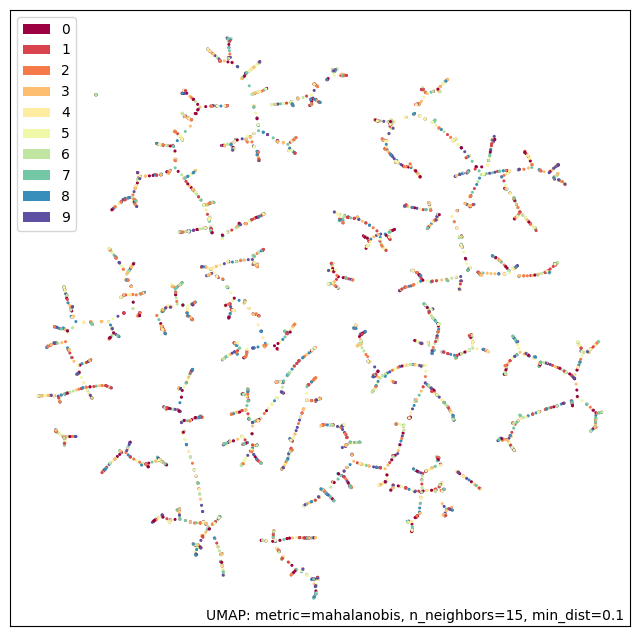

In [86]:
f = umap.plot.points(embedding2, labels=Y_train)

## Metrics 'minkowski'

In [87]:
%%time
embedding3 = umap.UMAP(n_components=2, metric='minkowski').fit(X_train)

CPU times: user 17.1 s, sys: 218 ms, total: 17.3 s
Wall time: 24.2 s


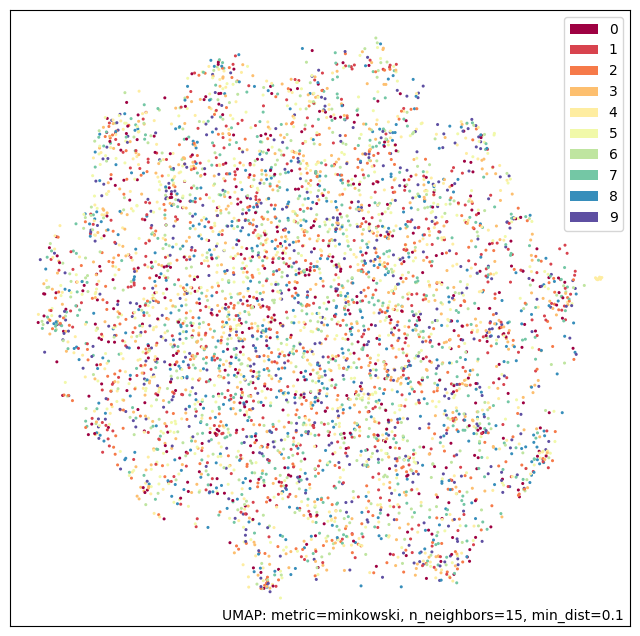

In [88]:
f = umap.plot.points(embedding3, labels=Y_train)

## Metric 'cosine'

In [89]:
%%time
embedding4 = umap.UMAP(n_components=2, metric='cosine').fit(X_train)

CPU times: user 15.5 s, sys: 273 ms, total: 15.7 s
Wall time: 16.3 s


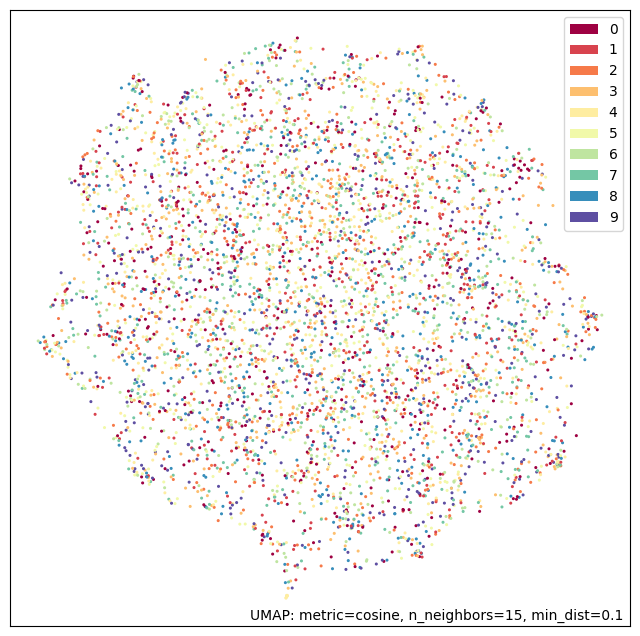

In [90]:
f = umap.plot.points(embedding4, labels=Y_train)


In [91]:
%%time
embedding5 = umap.UMAP(n_components=3, metric='cosine').fit(X_train)

CPU times: user 15.1 s, sys: 181 ms, total: 15.2 s
Wall time: 12.9 s


ValueError: Shape of passed values is (4999, 3), indices imply (4999, 2)

# UMAP cero

In [93]:
%%time
embedding6 = umap.UMAP().fit(X_train)

CPU times: user 24.6 s, sys: 301 ms, total: 24.9 s
Wall time: 19.2 s


/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

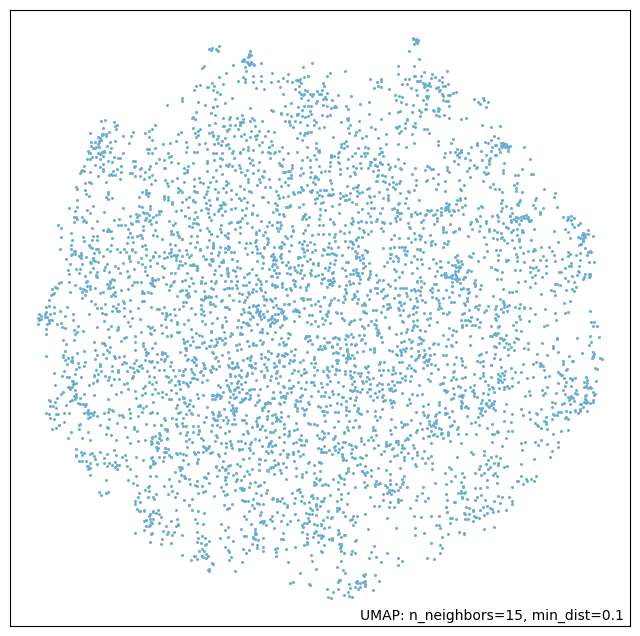

In [95]:
umap.plot.points(embedding6)

<Axes: >

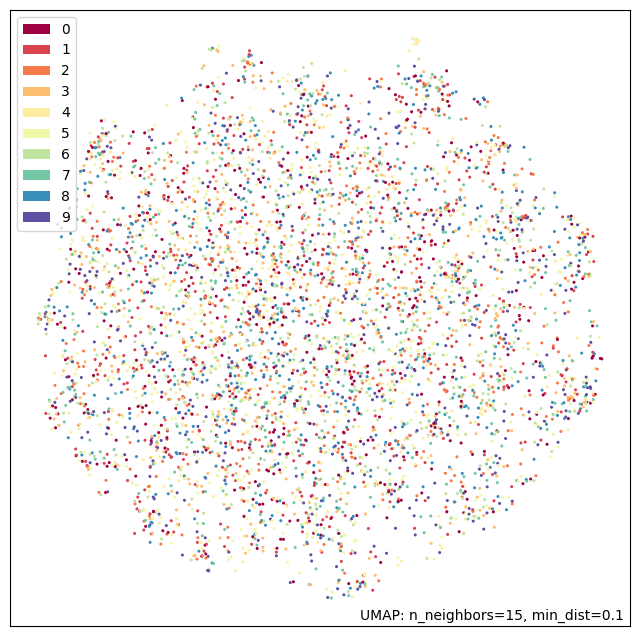

In [97]:
umap.plot.points(embedding6, labels=Y_train)

<Axes: >

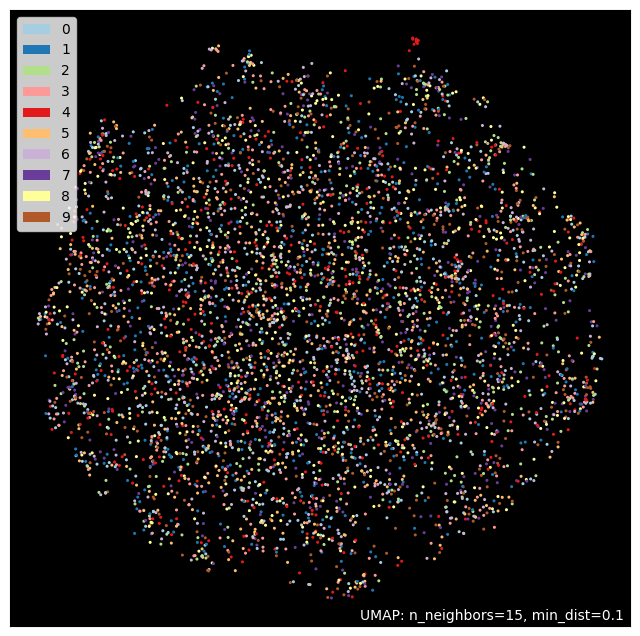

In [98]:
umap.plot.points(embedding6, labels=Y_train, color_key_cmap='Paired', background='black')

In [114]:
hover_data = pd.DataFrame({'index':np.arange(500),
                           'label':Y_train[:500]})

In [116]:
embedding7 = umap.UMAP().fit(X_train[:500])


/usr/local/lib/python3.10/dist-packages/datashader/transfer_functions/__init__.py:326: RuntimeWarning: invalid value encountered in divide
  scaled_data = (data - span[0])/(span[1] - span[0])


<Axes: >

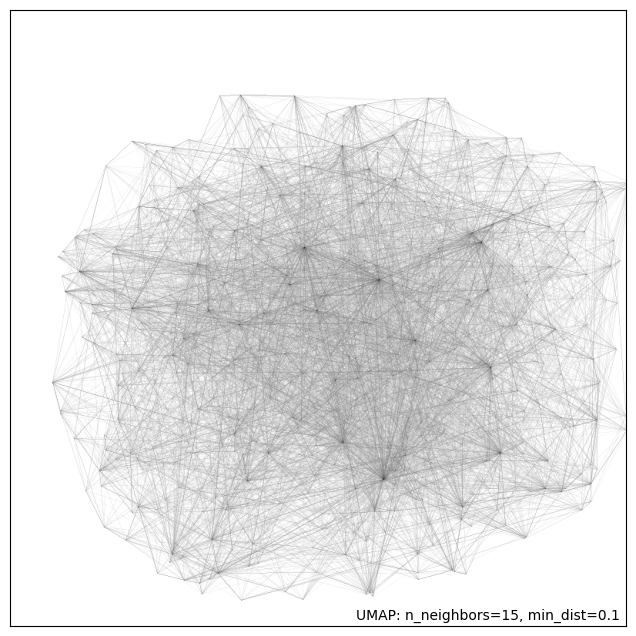

In [117]:
umap.plot.connectivity(embedding7, show_points=True)

/usr/local/lib/python3.10/dist-packages/umap/plot.py:894: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

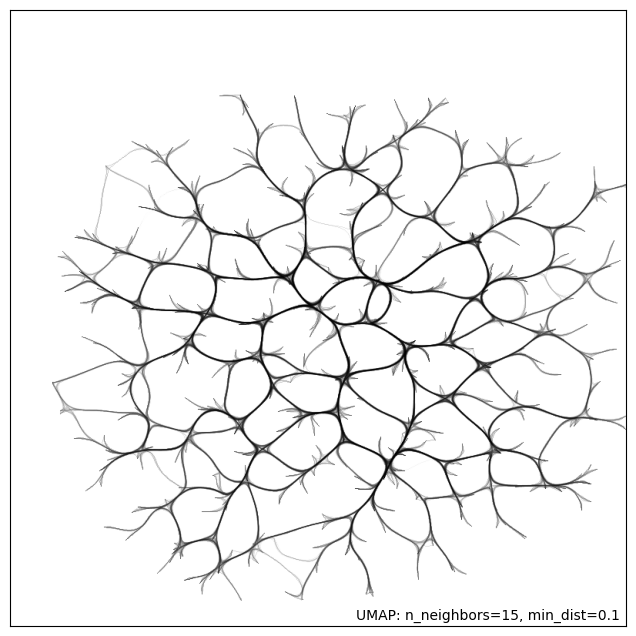

In [118]:
umap.plot.connectivity(embedding7, edge_bundling='hammer')

<Axes: >

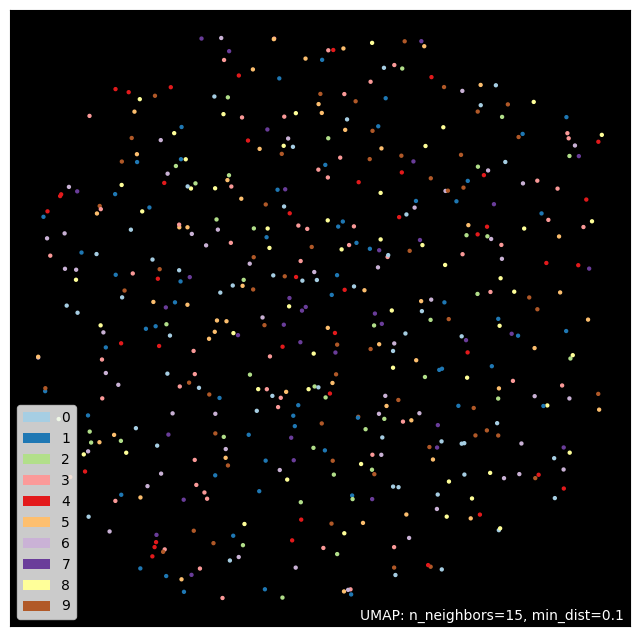

In [119]:
umap.plot.points(embedding7, labels=Y_train[:500], color_key_cmap='Paired', background='black')

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

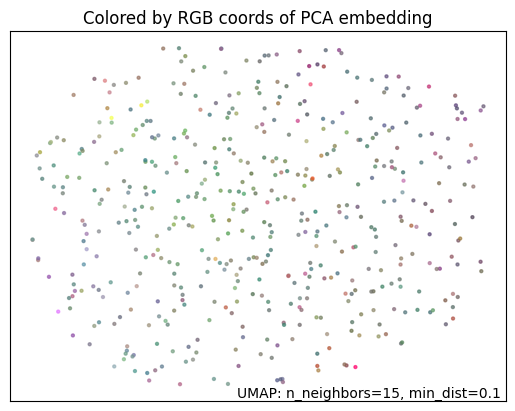

In [120]:
umap.plot.diagnostic(embedding7, diagnostic_type='pca')

<Axes: title={'center': 'Colored by approx local dimension'}>

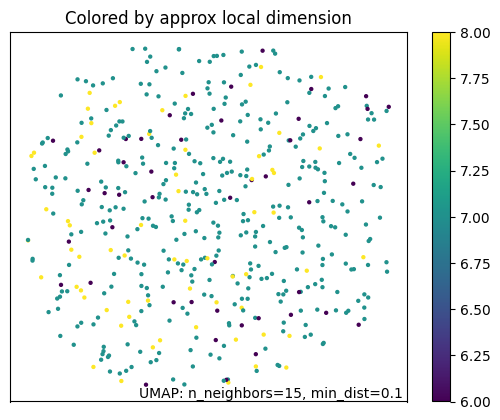

In [121]:
umap.plot.diagnostic(embedding7, diagnostic_type='local_dim')

# Haciendo todo con 30 datos de cada noticia entera

In [60]:
df_newsTotal.columns

Index(['text', 'label', 'Cluster_Num'], dtype='object')

In [61]:
#display(df_newsTotal_.head(1000))

In [62]:
df_newsTotal_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56337 entries, 0 to 56336
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         56337 non-null  object
 1   label        56337 non-null  object
 2   Cluster_Num  56337 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [63]:
df_list = []
for clus in range(0,10):
  mask = df_newsTotal_['Cluster_Num'] == clus
  filtro = df_newsTotal_[ mask  ]
  df_list.append(filtro.head(30))

data_df = pd.concat(df_list)
#display(data_df)

In [64]:
def Text_resumen(text):
  texto_largo = text
  words = word_tokenize(texto_largo)  #  split palabra por palabra
  words = [word.lower() for word in words if word.isalnum()]  # convierte las palabras mayusculas a minusculas
  filtered_words = [word for word in words if word not in stop_words]  # Filtramos las palabras que no esntan en nuestro diccionario
  tfidf_vectorizer = TfidfVectorizer()  # inicializamos el evaluador estadistico de palabras para ver las relaciones entre ellas
  tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(filtered_words)])
  feature_names = tfidf_vectorizer.get_feature_names_out()
  top_words = []
  for col in tfidf_matrix.nonzero()[1]:
    top_words.append((feature_names[col], tfidf_matrix[0, col]))
  top_words = sorted(top_words, key=lambda x: x[1], reverse=True)
  resumen = ""
  word_count = 0
  for word, tfidf_score in top_words:
    resumen += word + " "
    word_count += len(word.split())
  return resumen

In [65]:
data_df['text_analisis'] = data_df['text'].apply(Text_resumen)

In [66]:
print(data_df['text'].values[0])
print(data_df['text_analisis'].values[0])

El mundo del motociclismo, especialmente en Brasil, está de luto. Lo anterior, luego de la muerte del joven piloto Matheus Barbosa, quien falleció en plena carrera en el circuito de Interlagos, en Sao Paulo. El corredor de 23 años, campeón en la categoría SuperSport 600 en 2019, sufrió un grave accidente cuando competía en la SuperBike este fin de semana luego de impactar a alta velocidad una estructura metálica. De acuerdo a Infobae, Barbosa se aproximaba a la curva Juncao cuando, por razones que se investigan, perdió el control de su moto cuando se inclinó para tomarla y salió de la pista en una línea recta. El piloto chocó de frente con una base metálica y, pese a que recibió atención médica en menos de un minuto, las graves heridas que sufrió terminaron por costarle la vida casi al instante. Los organizadores del SuperBike confirmaron minutos después el fallecimiento del joven corredor, destacando que “por respeto a nuestro querido Matheus, y especialmente a su familia, todas las a

In [67]:
tokenizer = Tokenizer()
def tokenize_fun(texts_):
  tokenizer.fit_on_texts(texts_)
  sequences = tokenizer.texts_to_sequences(texts_)
  return sequences

In [68]:
data_df['text_tokenized'] = data_df['text_analisis'].apply(tokenize_fun)
display(data_df)

,text,label,Cluster_Num,text_analisis,text_tokenized
19,"El mundo del motociclismo, especialmente en Br...",catástrofes y accidentes,0,accidente barbosa terminaron menos metálica su...,"[[1], [9], [9], [4], [11], [2], [6], [7], [2],..."
21,"Sebastián Zamora, carabinero que está formaliz...",catástrofes y accidentes,0,frontal greda cruce ruta puchuncaví lesionados...,"[[17], [4], [3], [6], [9], [1], [12], [], [18]..."
31,"Fueron 9 familias, más de 40 personas las que ...",catástrofes y accidentes,0,km chile costas 489 melinka oeste generar nece...,"[[29], [12], [], [8], [20], [5], [11], [2], []..."
37,Un incendio afectó a un recinto educacional ab...,catástrofes y accidentes,0,años isla fiyi dos bainimarama dijo casas mien...,"[[1], [26], [3], [7], [], [5], [7], [11], [1],..."
59,"Bombas molotov, disparos y un hombre gravement...",catástrofes y accidentes,0,personas residencial cartagena hechos ocurrier...,"[[14], [2], [4], [7], [3], [6], [1], [7], [], ..."
...,...,...,...,...,...
296,Al menos dos pumas fueron avistados la madruga...,salud,9,ser grandes tras sector vacunas hábitat embarg...,"[[7], [2], [5], [], [15], [5], [1], [6], [10],..."
300,Un temblor se registró a las 09:14 horas de es...,salud,9,kilómetros aysén puerto suroeste 116 fijó refe...,"[[34], [3], [11], [18], [12], [2], [9], [5], [..."
317,Este lunes la Central de Abastecimiento del Si...,salud,9,vacunas isp autorización cenabast salud distri...,"[[16], [1], [8], [13], [6], [1], [7], [], [3],..."
328,Las autoridades de España entregaron una nueva...,salud,9,salud casos días personas número últimos exáme...,"[[7], [1], [11], [13], [10], [], [8], [1], [7]..."


In [69]:
data_df['text_tokenized']

19     [[1], [9], [9], [4], [11], [2], [6], [7], [2],...
21     [[17], [4], [3], [6], [9], [1], [12], [], [18]...
31     [[29], [12], [], [8], [20], [5], [11], [2], []...
37     [[1], [26], [3], [7], [], [5], [7], [11], [1],...
59     [[14], [2], [4], [7], [3], [6], [1], [7], [], ...
                             ...                        
296    [[7], [2], [5], [], [15], [5], [1], [6], [10],...
300    [[34], [3], [11], [18], [12], [2], [9], [5], [...
317    [[16], [1], [8], [13], [6], [1], [7], [], [3],...
328    [[7], [1], [11], [13], [10], [], [8], [1], [7]...
334    [[7], [2], [5], [], [8], [1], [7], [4], [7], [...
Name: text_tokenized, Length: 300, dtype: object

In [70]:
def largo(lista):
  return len(lista)

data_df['L_analisis'] = data_df['text_analisis'].apply( lambda x : len(x))
data_df['L_tokenized'] = data_df['text_tokenized'].apply( lambda x : len(x))
display(data_df)

,text,label,Cluster_Num,text_analisis,text_tokenized,L_analisis,L_tokenized
19,"El mundo del motociclismo, especialmente en Br...",catástrofes y accidentes,0,accidente barbosa terminaron menos metálica su...,"[[1], [9], [9], [4], [11], [2], [6], [7], [2],...",939,939
21,"Sebastián Zamora, carabinero que está formaliz...",catástrofes y accidentes,0,frontal greda cruce ruta puchuncaví lesionados...,"[[17], [4], [3], [6], [9], [1], [12], [], [18]...",1225,1225
31,"Fueron 9 familias, más de 40 personas las que ...",catástrofes y accidentes,0,km chile costas 489 melinka oeste generar nece...,"[[29], [12], [], [8], [20], [5], [11], [2], []...",1303,1303
37,Un incendio afectó a un recinto educacional ab...,catástrofes y accidentes,0,años isla fiyi dos bainimarama dijo casas mien...,"[[1], [26], [3], [7], [], [5], [7], [11], [1],...",1638,1638
59,"Bombas molotov, disparos y un hombre gravement...",catástrofes y accidentes,0,personas residencial cartagena hechos ocurrier...,"[[14], [2], [4], [7], [3], [6], [1], [7], [], ...",1680,1680
...,...,...,...,...,...,...,...
296,Al menos dos pumas fueron avistados la madruga...,salud,9,ser grandes tras sector vacunas hábitat embarg...,"[[7], [2], [5], [], [15], [5], [1], [6], [10],...",1161,1161
300,Un temblor se registró a las 09:14 horas de es...,salud,9,kilómetros aysén puerto suroeste 116 fijó refe...,"[[34], [3], [11], [18], [12], [2], [9], [5], [...",199,199
317,Este lunes la Central de Abastecimiento del Si...,salud,9,vacunas isp autorización cenabast salud distri...,"[[16], [1], [8], [13], [6], [1], [7], [], [3],...",985,985
328,Las autoridades de España entregaron una nueva...,salud,9,salud casos días personas número últimos exáme...,"[[7], [1], [11], [13], [10], [], [8], [1], [7]...",2587,2587


In [71]:
data_df.describe()

,Cluster_Num,L_analisis,L_tokenized
count,300.00000,300.000000,300.000000
mean,4.50000,1275.566667,1275.566667
std,2.87708,719.860934,719.860934
min,0.00000,142.000000,142.000000
25%,2.00000,748.750000,748.750000
50%,4.50000,1137.500000,1137.500000
75%,7.00000,1654.000000,1654.000000
max,9.00000,5408.000000,5408.000000


In [73]:
text__3 = data_df['text_analisis'].values
labels__3 = data_df['Cluster_Num'].values

In [74]:
text__3[0]

'accidente barbosa terminaron menos metálica superbike sufrió corredor interlagos circuito carrera matheus piloto joven luego anterior especialmente malogrado efecto lamentablemente seguridad medidas nuevas implementaron competencias diferentes murieron berto danilo paludete maurício meses dos pasado año fórmula utilizado fatal primer mencionar cabe roja bandera inmediatamente interrumpida ocurrió cancelaron restantes carreras inmediato día actividades todas familia querido respeto destacando fallecimiento después minutos confirmaron organizadores instante casi vida costarle heridas graves minuto médica atención recibió pese base frente chocó recta línea pista salió tomarla inclinó moto control perdió investigan razones juncao curva aproximaba infobae acuerdo estructura velocidad alta impactar semana fin competía grave 2019 600 supersport categoría campeón años 23 paulo sao plena falleció muerte luto brasil motociclismo mundo '

In [75]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text__3)
sequences = tokenizer.texts_to_sequences(text__3)

In [77]:
data_pad = pad_sequences(sequences, maxlen=5408)

In [82]:
print(  len(labels__3), len(data_pad))
data_list = [ list(dat) for dat in data_pad ]
data_ = {'Labels': labels__3,
        'News': data_list}
df_news_pad2 = pd.DataFrame(data_)
df_news_pad2.head()

300 300


,Labels,News
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
columnas2 = [ f"columna_{i}" for i in range(1,5408+1) ]
# Dividir la columna 'Dato2' en tres columnas separadas
df_news_pad2[columnas2] = pd.DataFrame(df_news_pad2['News'].tolist())
df_news_pad2 = df_news_pad2.drop('News', axis=1)

X_train = df_news_pad2.drop('Labels', axis=1)
Y_train = df_news_pad2['Labels']

## UMAP

In [86]:
%%time
embedding8 = umap.UMAP(n_components=2, metric='hellinger').fit(X_train)

CPU times: user 17.8 s, sys: 189 ms, total: 18 s
Wall time: 35.7 s


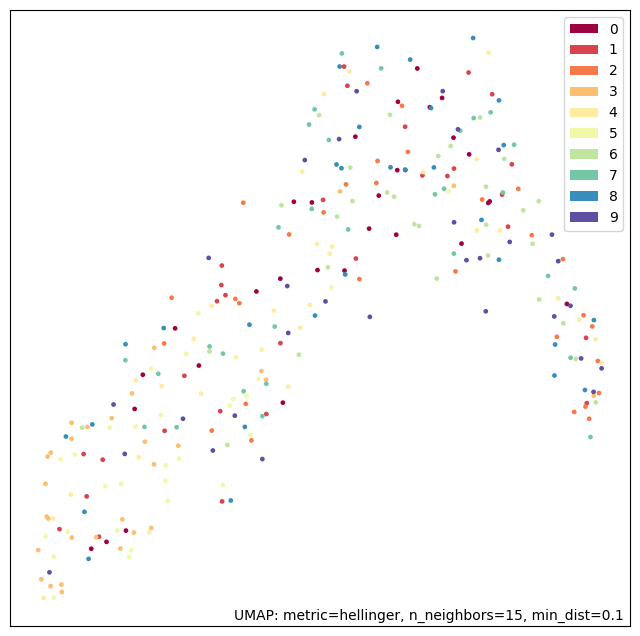

In [87]:
f = umap.plot.points(embedding8, labels=Y_train)

## PCA

In [96]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [91]:
vectorizador = TfidfVectorizer()
matriz_tfidf = vectorizador.fit_transform(data_df['text'])

In [103]:
pca = PCA(n_components=3)
pca_resultados = pca.fit_transform(matriz_tfidf.toarray())
#pca_resultados['Cluster'] = data_df['Cluster_Num']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

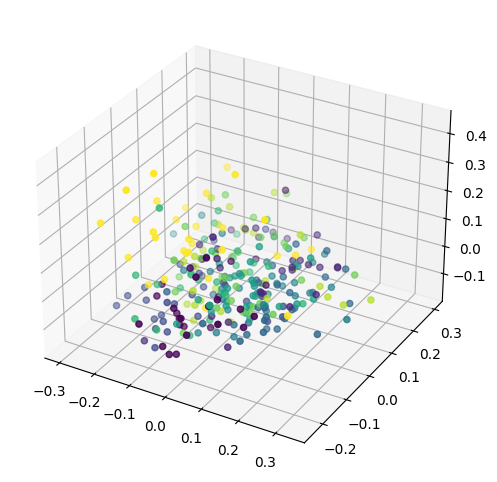

In [99]:
# Crear DataFrame con resultados
df_resultados = pd.DataFrame(data=pca_resultados, columns=['Componente_1', 'Componente_2', 'Componente_3'])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_resultados['Componente_1'], df_resultados['Componente_2'], df_resultados['Componente_3'], c=data_df['Cluster_Num'], cmap='viridis')

In [100]:
!pip install plotly

In [106]:
import plotly.express as px

# Supongamos que tienes un DataFrame llamado df_resultados con las componentes y etiquetas de cluster
fig = px.scatter_3d(df_resultados, x='Componente_1', y='Componente_2', z='Componente_3', color=data_df['Cluster_Num'])
fig.show()